In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/IWS/Delivery/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the data 

In this work, we try to use all the VFA data as the labels, the Flow, pH, ORP, temp (15 minutes), rainfall, total solids, ss, BOD5, NH3, Org-N, and SO4 (daily) as training data.
We then open the Excel file directly. It will take a minute or two to open the file.
H2S will be used as the labels.

In [ ]:
import pandas as pd
r = 'Model 2 data.xlsx'

We will now load the flow, ORP, pH, temp, and NOOA data:

In [ ]:
# Orp, pH, temp, flow, tunnel_elev_ft
data = pd.read_excel(r, sheet_name='15min data', index_col='date_time', parse_dates=True)
data_daily_max = data.groupby(pd.Grouper(freq='D')).max()
data_daily_max

/usr/local/lib/python3.6/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname D identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/usr/local/lib/python3.6/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname S identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,flow_mgd,tunnel_elev_ft,ORP_mV,pH,temp_F,tunnel_pumping,CUP,TUNNEL VOL (MG)
date_time,,,,,,,,
2013-03-06,34.8,6.481,31.3,7.4,56.2,NaN,no-cup,3.144
2013-03-07,42.7,6.606,30.7,7.3,56.3,NaN,no-cup,3.324
2013-03-08,64.7,7.848,158.7,7.4,56.0,NaN,no-cup,4.776
2013-03-09,64.0,8.318,54.7,7.2,55.1,NaN,no-cup,5.450
2013-03-10,147.8,80.420,87.1,7.2,53.7,NaN,no-cup,70.000
...,...,...,...,...,...,...,...,...
2019-08-22,31.5,5.678,-318.9,7.3,75.2,0.0,no-cup,NaN
2019-08-23,44.2,6.032,252.8,7.6,73.0,0.0,no-cup,NaN
2019-08-24,25.1,5.378,292.9,7.6,72.8,0.0,no-cup,NaN


In [ ]:
# Rainfall data
r = 'Rainfall data.xlsx'
rf = pd.read_excel(r,sheet_name='Daily',index_col='DATE')
rf.drop(['PRCP_KWRP'],inplace=True,axis=1)
rf

,PRCP_NOOA
DATE,
1997-01-01,0.01
1997-01-02,0.00
1997-01-03,0.01
1997-01-04,0.41
1997-01-05,0.00
...,...
2019-08-27,0.00
2019-08-28,0.00
2019-08-29,0.00


In [ ]:
data_daily_max = data_daily_max.join(rf,how='inner')
data_daily_max

,flow_mgd,tunnel_elev_ft,ORP_mV,pH,temp_F,tunnel_pumping,CUP,TUNNEL VOL (MG),PRCP_NOOA
2013-03-06,34.8,6.481,31.3,7.4,56.2,NaN,no-cup,3.144,0.00
2013-03-07,42.7,6.606,30.7,7.3,56.3,NaN,no-cup,3.324,0.00
2013-03-08,64.7,7.848,158.7,7.4,56.0,NaN,no-cup,4.776,0.00
2013-03-09,64.0,8.318,54.7,7.2,55.1,NaN,no-cup,5.450,0.04
2013-03-10,147.8,80.420,87.1,7.2,53.7,NaN,no-cup,70.000,0.87
...,...,...,...,...,...,...,...,...,...
2019-08-22,31.5,5.678,-318.9,7.3,75.2,0.0,no-cup,NaN,0.00
2019-08-23,44.2,6.032,252.8,7.6,73.0,0.0,no-cup,NaN,0.00
2019-08-24,25.1,5.378,292.9,7.6,72.8,0.0,no-cup,NaN,0.00
2019-08-25,29.9,5.602,290.5,7.5,74.6,0.0,no-cup,NaN,0.00


We now deal with the waste water data (total solids, ss, etc.):

In [ ]:
import numpy as np
###r = 'Water Quality Analysis Data_composite and grab samples.xlsx'
###ww_data = pd.read_excel(r,sheet_name='raw_sewage', header=2)

r = 'Water-Quality-Analysis-Data.xlsx'
ww_data = pd.read_excel(r,sheet_name='raw_sewage', header = 3, index_col='Date')

#ww_data = ww_data.apply(lambda x: np.nan if x.dtype == str else x)

# Drop the units
###ww_data.drop(['Date'],inplace=True, axis=0)


In [ ]:
# Drop Temp, pH, ORP, SO3, orthoP SO4-
ww_data.drop(['Temp','pH','ORP','SO3','orthoP','SO4-'],inplace=True, axis=1)

In [ ]:
# Replace white spaces with nan
ww_data['SO4'][ww_data['SO4'] == '     '] = np.nan
ww_data['SO4'][ww_data['SO4'] == '       '] = np.nan
ww_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,SO4,VFA
Date,,,,,,,,,
1997-01-01,875.0,176.0,172,12.64,14.5,27.15,4.78,NaN,NaN
1997-01-02,834.0,152.0,171,11.88,16.0,27.92,4.32,NaN,NaN
1997-01-03,912.0,90.0,128,11.12,15.6,26.73,3.7,NaN,NaN
1997-01-04,1083.0,208.0,167,7.73,18.1,25.83,4.14,NaN,NaN
1997-01-05,994.0,196.0,125,8.90,11.4,20.27,3.46,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-08-27,562.0,59.0,51,8.10,6.4,14.45,1.72,NaN,NaN
2019-08-28,980.0,276.0,160,16.28,16.2,32.47,5.06,NaN,NaN
2019-08-29,890.0,160.0,133,18.43,12.4,30.83,5.11,98,NaN


In [ ]:
###ww_data['SO4'] = ww_data['SO4'].interpolate()

In [ ]:
ww_data['VFA']

Date
1997-01-01   NaN
1997-01-02   NaN
1997-01-03   NaN
1997-01-04   NaN
1997-01-05   NaN
              ..
2019-08-27   NaN
2019-08-28   NaN
2019-08-29   NaN
2019-08-30   NaN
2019-08-31   NaN
Name: VFA, Length: 8278, dtype: float64

In [ ]:
# Fill NA for SO4 without VFA
VFA = ww_data['VFA']
ww_data.drop('VFA',inplace=True,axis=1)
ww_data.fillna(method='backfill',inplace=True)
ww_data


,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,SO4
Date,,,,,,,,
1997-01-01,875.0,176.0,172,12.64,14.5,27.15,4.78,215.0
1997-01-02,834.0,152.0,171,11.88,16.0,27.92,4.32,215.0
1997-01-03,912.0,90.0,128,11.12,15.6,26.73,3.7,215.0
1997-01-04,1083.0,208.0,167,7.73,18.1,25.83,4.14,215.0
1997-01-05,994.0,196.0,125,8.90,11.4,20.27,3.46,215.0
...,...,...,...,...,...,...,...,...
2019-08-27,562.0,59.0,51,8.10,6.4,14.45,1.72,98.0
2019-08-28,980.0,276.0,160,16.28,16.2,32.47,5.06,98.0
2019-08-29,890.0,160.0,133,18.43,12.4,30.83,5.11,98.0


In [ ]:
# Add VFA back
ww_data = ww_data.join(VFA,how='inner')
ww_data

,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,SO4,VFA
Date,,,,,,,,,
1997-01-01,875.0,176.0,172,12.64,14.5,27.15,4.78,215.0,NaN
1997-01-02,834.0,152.0,171,11.88,16.0,27.92,4.32,215.0,NaN
1997-01-03,912.0,90.0,128,11.12,15.6,26.73,3.7,215.0,NaN
1997-01-04,1083.0,208.0,167,7.73,18.1,25.83,4.14,215.0,NaN
1997-01-05,994.0,196.0,125,8.90,11.4,20.27,3.46,215.0,NaN
...,...,...,...,...,...,...,...,...,...
2019-08-27,562.0,59.0,51,8.10,6.4,14.45,1.72,98.0,NaN
2019-08-28,980.0,276.0,160,16.28,16.2,32.47,5.06,98.0,NaN
2019-08-29,890.0,160.0,133,18.43,12.4,30.83,5.11,98.0,NaN


In [ ]:
# Add those per 15 minutes data
joined_data = ww_data.join(data_daily_max,how='inner')
joined_data.iloc[-1]

Total Solids          678
SS                    136
BOD5                  104
NH3                 15.77
Org-N                 9.1
TKN                 24.83
P-TOT                 3.4
SO4                    66
VFA                   NaN
flow_mgd             91.3
tunnel_elev_ft      8.689
ORP_mV              227.2
pH                    7.2
temp_F                 74
tunnel_pumping          0
CUP                no-cup
TUNNEL VOL (MG)       NaN
PRCP_NOOA             1.4
Name: 2019-08-26 00:00:00, dtype: object

In [ ]:
joined_data

,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,SO4,VFA,flow_mgd,tunnel_elev_ft,ORP_mV,pH,temp_F,tunnel_pumping,CUP,TUNNEL VOL (MG),PRCP_NOOA
2013-03-06,2042.0,266.0,231,13.40,14.4,27.80,4.8,56.0,5.0,34.8,6.481,31.3,7.4,56.2,NaN,no-cup,3.144,0.00
2013-03-07,1745.0,234.0,189,13.73,12.5,26.20,4.3,56.0,NaN,42.7,6.606,30.7,7.3,56.3,NaN,no-cup,3.324,0.00
2013-03-08,1442.0,130.0,94,11.59,8.2,19.80,3.1,56.0,NaN,64.7,7.848,158.7,7.4,56.0,NaN,no-cup,4.776,0.00
2013-03-09,1587.0,286.0,162,10.37,12.3,22.70,4.2,56.0,NaN,64.0,8.318,54.7,7.2,55.1,NaN,no-cup,5.450,0.04
2013-03-10,1191.0,162.0,78,4.30,6.2,10.50,1.9,56.0,7.0,147.8,80.420,87.1,7.2,53.7,NaN,no-cup,70.000,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-22,866.0,134.0,145,18.53,10.3,28.85,4.67,66.0,NaN,31.5,5.678,-318.9,7.3,75.2,0.0,no-cup,NaN,0.00
2019-08-23,892.0,138.0,134,22.31,10.2,32.46,4.13,66.0,NaN,44.2,6.032,252.8,7.6,73.0,0.0,no-cup,NaN,0.00
2019-08-24,950.0,214.0,163,21.00,12.5,33.52,6.45,66.0,NaN,25.1,5.378,292.9,7.6,72.8,0.0,no-cup,NaN,0.00
2019-08-25,810.0,132.0,109,19.58,8.9,28.49,3.46,66.0,NaN,29.9,5.602,290.5,7.5,74.6,0.0,no-cup,NaN,0.00


In [ ]:
joined_data = joined_data[joined_data.VFA.notna()]


In [ ]:
joined_data

,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,SO4,VFA,flow_mgd,tunnel_elev_ft,ORP_mV,pH,temp_F,tunnel_pumping,CUP,TUNNEL VOL (MG),PRCP_NOOA
2013-03-06,2042.0,266.0,231,13.40,14.4,27.80,4.8,56.0,5.0,34.8,6.481,31.3,7.4,56.2,NaN,no-cup,3.144,0.00
2013-03-10,1191.0,162.0,78,4.30,6.2,10.50,1.9,56.0,7.0,147.8,80.420,87.1,7.2,53.7,NaN,no-cup,70.000,0.87
2013-03-13,1043.0,50.0,47,5.80,4.2,10.00,1.3,92.0,5.0,90.7,33.327,103.1,7.2,51.7,NaN,emptying,65.585,0.00
2013-03-18,1184.0,132.0,129,9.46,8.6,18.00,2.6,92.0,5.0,43.5,8.312,356.6,7.4,55.6,NaN,emptying,5.306,0.08
2013-03-21,1907.0,783.0,460,13.89,26.1,40.00,7.8,103.0,33.0,42.0,5.751,67.8,7.3,55.0,NaN,no-cup,2.386,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-13,928.0,68.0,119,11.70,7.8,19.47,3.07,93.0,25.0,94.5,21.207,74.9,7.6,59.3,1.0,emptying,NaN,0.00
2019-05-16,990.0,144.0,123,10.66,9.0,19.68,3.49,78.0,19.0,58.6,12.145,72.6,7.2,61.4,0.0,no-cup,NaN,0.44
2019-05-20,894.0,110.0,93,12.18,9.0,21.15,2.36,78.0,36.0,45.2,5.701,33.4,7.6,62.8,0.0,no-cup,NaN,0.00
2019-05-23,806.0,60.0,67,9.46,5.3,14.79,2.23,73.0,5.0,44.0,8.947,49.3,7.5,59.2,0.0,no-cup,NaN,0.08


In [ ]:
# # Drop all the missing VFA cells
#joined_data.dropna(inplace=True)
joined_data.fillna(method='ffill',inplace=True)
joined_data.iloc[-1]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Total Solids          918
SS                    166
BOD5                  138
NH3                  12.1
Org-N                11.1
TKN                 23.24
P-TOT                3.86
SO4                    82
VFA                     5
flow_mgd             43.4
tunnel_elev_ft      6.801
ORP_mV                -75
pH                    7.5
temp_F               61.2
tunnel_pumping          0
CUP                no-cup
TUNNEL VOL (MG)        70
PRCP_NOOA            0.63
Name: 2019-05-28 00:00:00, dtype: object

In [ ]:
joined_data.dropna(inplace=True)
joined_data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(58, 18)

In [ ]:
joined_data

,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,SO4,VFA,flow_mgd,tunnel_elev_ft,ORP_mV,pH,temp_F,tunnel_pumping,CUP,TUNNEL VOL (MG),PRCP_NOOA
2017-07-12,394.0,92.0,34,2.52,4.30,6.82,1.32,76.0,1.067,118.1,96.133,50.7,7.1,73.4,0.0,no-cup,70.000,1.77
2017-07-19,894.0,182.0,131,13.43,10.20,23.60,4.07,55.0,62.785,64.1,9.246,-10.9,6.9,70.9,0.0,no-cup,5.981,0.48
2017-07-20,970.0,578.0,166,4.36,15.90,20.24,5.32,55.0,1.067,121.5,82.446,99.5,6.7,72.9,0.0,no-cup,70.000,1.77
2017-07-26,1545.0,720.0,360,11.34,26.20,37.52,7.60,100.0,48.509,66.0,14.371,88.5,8.0,71.0,0.0,no-cup,12.562,0.03
2017-07-27,1289.0,538.0,197,12.29,19.00,31.32,5.67,100.0,75.720,39.6,6.009,-17.6,8.1,69.6,0.0,no-cup,2.606,0.00
2017-08-09,966.0,184.0,161,17.54,13.30,30.78,4.62,99.0,16.005,40.3,5.759,-414.6,7.2,71.2,0.0,no-cup,2.417,0.00
2017-08-16,1022.0,278.0,202,18.50,13.60,32.13,4.62,93.0,25.262,40.8,6.075,-96.2,7.3,71.8,0.0,no-cup,2.719,0.17
2017-08-23,916.0,180.0,154,21.15,12.60,33.75,4.86,75.0,68.698,30.3,5.999,-135.2,7.4,71.9,0.0,no-cup,2.598,0.00
2017-08-30,970.0,232.0,158,17.37,13.50,30.88,4.74,82.0,101.834,38.1,6.893,-296.2,7.3,72.6,0.0,no-cup,3.637,0.00
2017-09-06,822.0,124.0,159,24.15,12.20,36.31,4.83,91.0,26.186,34.6,5.712,-38.4,7.4,70.9,0.0,no-cup,2.360,0.00


In [ ]:
# # Generate switch
# switch = []
# switch_value = 0
# for value in joined_data['tunnel_elev_ft']:
#     if switch_value == 0 and value <= 40:
#         switch.append(switch_value)
#     elif switch_value == 0 and value > 40:
#         switch_value = 1
#         switch.append(switch_value)
#     elif switch_value == 1 and value > 5:
#         switch.append(switch_value)
#     elif value <= 5:
#         switch_value = 0
#         switch.append(switch_value)
        
# assert(len(switch) == len(joined_data['tunnel_elev_ft']))

# Tunnel level: previous - current
tunnel_level = joined_data['tunnel_elev_ft'].values[:-1]-joined_data['tunnel_elev_ft'].values[1:]

# switch.pop(-1)

joined_data = joined_data.drop(joined_data.index[-1])

# joined_data['switch'] = switch
joined_data['tunnel_elev_ft'] = tunnel_level
joined_data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(2366, 18)

In [ ]:
print("Max level of VFA: ",joined_data['VFA'].max())

Max level of VFA:  101.834


In [ ]:
print("Min level of VFA: ",joined_data['VFA'].min())

Min level of VFA:  0.0


In [ ]:
joined_data['VFA']

2013-03-06    5.0
2013-03-07    NaN
2013-03-08    NaN
2013-03-09    NaN
2013-03-10    7.0
             ... 
2019-08-21    NaN
2019-08-22    NaN
2019-08-23    NaN
2019-08-24    NaN
2019-08-25    NaN
Name: VFA, Length: 2366, dtype: float64

In [ ]:
# max is roughly 110
VFA_values = joined_data['VFA'].values
VFA_values

(2366,)

In [ ]:
# Level defines the number of classes
level = 10
Max = 110
levels = Max//level
labels = []
for vfa in VFA_values:
    if vfa <= 5:
        labels.append(0)
    elif vfa <= 10:
        labels.append(1)
    else:
        for i in range(2,levels+1):
            if vfa <= i*level:
                labels.append(i)
                break;

In [ ]:
len(labels)

194

In [ ]:
# Make the labels list into a Series for the histogram
s_labels = pd.Series(labels)
print("# of examples in class 1: ",sum(np.array(labels)==1))
assert(len(VFA_values)==len(labels))

# of examples in class 1:  39


AssertionError: ignored

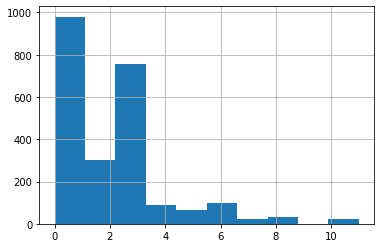

In [ ]:
%matplotlib inline
s_labels.hist()

We need random oversampling to solve the imbanlanaced dataset problem

In [ ]:
train_data

array([[2042. ,  266. ,  231. , ...,   56.2,    nan,    0. ],
       [1745. ,  234. ,  189. , ...,   56.3,    nan,    0. ],
       [1442. ,  130. ,   94. , ...,   56. ,    nan,    0. ],
       ...,
       [ 892. ,  138. ,  134. , ...,   73. ,    0. ,    0. ],
       [ 950. ,  214. ,  163. , ...,   72.8,    0. ,    0. ],
       [ 810. ,  132. ,  109. , ...,   74.6,    0. ,    0. ]])

In [ ]:
np.isnan(train_data)
np.where(np.isnan(train_data))

(array([   0,    1,    2, ..., 1588, 1589, 1590]),
 array([13, 13, 13, ..., 13, 13, 13]))

In [ ]:
train_data = (joined_data.drop('VFA',axis=1)).drop(['TUNNEL VOL (MG)','CUP'],axis=1).values
import sys

from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
ros = RandomOverSampler(random_state=0)
#ada = ADASYN(random_state=43, n_neighbors=4)
X_resampled, y_resampled = ros.fit_resample(train_data, s_labels.values)

ValueError: ignored

After the random oversampling, each class now has same amount of data.
However, if the level is set to be 10, class 11 will have no data:

In [ ]:
from collections import Counter
sampling_info = sorted(Counter(y_resampled).items())
print(sampling_info)
y_resampled.size

[(0, 754), (1, 754), (2, 754), (3, 754), (4, 754), (5, 754), (6, 754), (7, 754), (8, 754), (10, 754), (11, 754)]


8294

## Data normalization:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_resampled)
X_normalized = scaler.transform(X_resampled)
X_normalized.shape

(8294, 15)

## Data sampling (train v.s. test)

In [ ]:
jump = sampling_info[0][1] # jump should be the amount of data under each class
split = 0.2
test_amount = int(jump*split)

seed = 43
np.random.seed(seed=seed)
test_indices = []

#11 is the number of classes
for i in range(11):
    test_indices += list(np.random.choice(np.arange(i*jump,(i+1)*jump),size=test_amount, replace=False))
    
assert(len(test_indices) == (11)*test_amount)
assert(len(set(test_indices)) == len(test_indices))

In [ ]:
train_indices = list(set(np.arange(len(y_resampled))).difference(set(test_indices)))
train_data, train_labels = X_resampled[train_indices], y_resampled[train_indices]
test_data, test_labels = X_resampled[test_indices], y_resampled[test_indices]

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((6644, 15), (6644,), (1650, 15), (1650,))

## Classification

In [ ]:
# Try to remove outliers
# from sklearn.ensemble import IsolationForest
# from imblearn import FunctionSampler

# rng = np.random.RandomState(seed)
# def outlier_rejection(X, y):
#     """This will be our function used to resample our dataset."""
#     model = IsolationForest(max_samples=100,
#                             contamination=0.4,
#                             random_state=rng)
#     model.fit(X)
#     y_pred = model.predict(X)
#     return X[y_pred == 1], y[y_pred == 1]

# reject_sampler = FunctionSampler(func=outlier_rejection)
# train_data, train_labels = reject_sampler.fit_resample(train_data, train_labels)
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(random_state=seed)
param_grid = [{'n_estimators': [50,100], 'max_features':[4,6,8,10,15], 'bootstrap': [False]}]
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(train_data, train_labels)

best_rf = grid_search.best_estimator_

print(best_rf)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=43, verbose=0, warm_start=False)


In [ ]:
predictions = best_rf.predict(test_data)
print(classification_report(test_labels, predictions))
print("Accuracy: %.2f%%"%((predictions==test_labels).sum()/test_labels.size*100))

             precision    recall  f1-score   support

          0       0.75      0.72      0.74       151
          1       0.85      0.90      0.88       137
          2       0.90      0.93      0.91       149
          3       0.78      0.74      0.76       162
          4       0.99      1.00      1.00       170
          5       1.00      1.00      1.00       132
          6       0.99      1.00      1.00       152
          7       1.00      1.00      1.00       148
          8       1.00      1.00      1.00       149
         10       0.99      1.00      0.99       151
         11       1.00      1.00      1.00       149

avg / total       0.93      0.93      0.93      1650

Accuracy: 93.39%


In [ ]:
# Attribute importance
d = dict(zip(joined_data.drop(['VFA','TUNNEL VOL (MG)','CUP'],axis=1).columns.values.tolist(),best_rf.feature_importances_))
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_d)

[('SO4', 0.1403019529021344), ('temp_F', 0.12031366611346835), ('ORP_mV', 0.10186662932600093), ('flow_mgd', 0.07825940964172455), ('pH', 0.07436407337905843), ('Total Solids', 0.07090608976848795), ('TKN', 0.06668061046824307), ('NH3', 0.06630827774194085), ('Org-N', 0.05439892299284101), ('SS', 0.05414777650800924), ('tunnel_elev_ft', 0.05306882166907968), ('P-TOT', 0.05014862797722009), ('BOD5', 0.049499988557363574), ('PRCP_NOOA', 0.019159970037525315), ('tunnel_pumping', 0.0005751829169025007)]


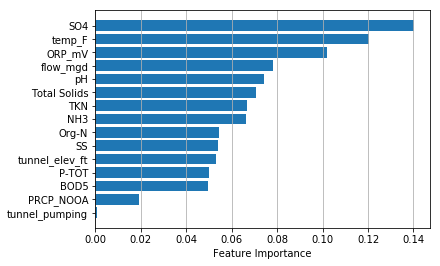

In [ ]:
#bar plot for feature importance
import matplotlib.pyplot as plt
scores = []
Vars = []
for k,v in sorted_d[::-1]:
    scores.append(v)
    Vars.append(k)
plt.barh(np.arange(len(scores)), scores,align='center')
plt.yticks(np.arange(len(scores)), Vars)
plt.xlabel('Feature Importance')
plt.grid(True,axis='x')
plt.show()

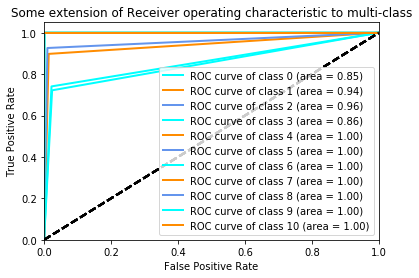

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
labels = [k for k,v in sorted(Counter(y_resampled).items())]
predictions = label_binarize(predictions,classes=labels)

test_labels_copy = label_binarize(test_labels,classes=labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_copy[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw=2
for i, color in zip(range(len(labels)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Let's try SVM:

In [ ]:
from sklearn.svm import SVC

# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# score = 'accuracy'
# grid_search = GridSearchCV(SVC(random_state=seed), tuned_parameters, cv=5,
#                    scoring= score, n_jobs=-1)
# grid_search.fit(train_data, train_labels)
# best_svm = grid_search.best_estimator_
best_svm = SVC(gamma=2, C=1,random_state=seed)
best_svm.fit(train_data, train_labels)
predictions = best_svm.predict(test_data)
print(classification_report(test_labels, predictions))
print("Accuracy: %.2f%%"%((predictions==test_labels).sum()/test_labels.size*100))

             precision    recall  f1-score   support

          0       1.00      0.34      0.51       151
          1       1.00      0.82      0.90       137
          2       1.00      0.85      0.92       149
          3       0.52      1.00      0.69       162
          4       1.00      0.99      0.99       170
          5       1.00      1.00      1.00       132
          6       1.00      1.00      1.00       152
          7       1.00      1.00      1.00       148
          8       1.00      1.00      1.00       149
         10       1.00      1.00      1.00       151
         11       1.00      1.00      1.00       149

avg / total       0.95      0.91      0.91      1650

Accuracy: 91.03%


In [ ]:
# # Attribute importance
# d = dict(zip(joined_data.drop('VFA',axis=1).columns.values.tolist(),best_svm.feature_importances_))
# import operator
# sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
# print(sorted_d)

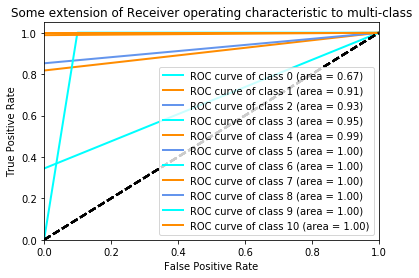

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
labels = [k for k,v in sorted(Counter(y_resampled).items())]
predictions = label_binarize(predictions,classes=labels)

test_labels_copy = label_binarize(test_labels,classes=labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_copy[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw=2
for i, color in zip(range(len(labels)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
hasattr(best_svm,'decision_function')

True

[]

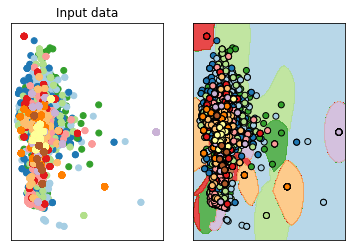

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X = PCA(n_components=2).fit_transform(train_data)

#use two best features
# X = np.hstack((train_data[:,3],train_data[:,10])).reshape(-1,2)
X = StandardScaler().fit_transform(X)
best_svm = SVC(random_state=seed)
best_svm.fit(X,train_labels)

h=0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

from matplotlib.colors import ListedColormap

#plot input data
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 2, 1)
ax.set_title("Input data")
ax.scatter(X[:, 0], X[:, 1], c=train_labels, cmap=plt.cm.Paired)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

#plot boundaries
ax = plt.subplot(1, 2, 2)
Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx,yy,Z, cmap=plt.cm.Paired, alpha=.8)
ax.scatter(X[:, 0], X[:, 1], c=train_labels, cmap=plt.cm.Paired,
               edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())       